In [ ]:
import torch

In [2]:
torch.cuda.is_available()

True

In [8]:
torch.version.cuda

'11.6'

In [9]:
torch.__version__

'1.13.1'

In [2]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3060 Laptop GPU'

## Step 1: Download images of birds and non-birds

In [25]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200): 
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [26]:
urls = search_images('superman', max_images=1)
urls[0]

'https://posterspy.com/wp-content/uploads/2019/09/Superman-Portrait-small.jpg'

...and then download a URL and take a look at it:

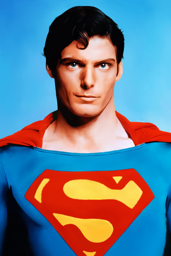

In [27]:
from fastdownload import download_url
dest = 'superman.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

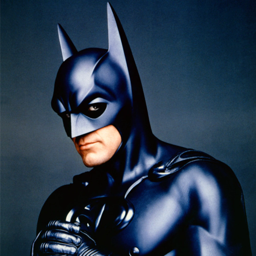

In [8]:
download_url(search_images('batman photos', max_images=1)[0], 'batman.jpg', show_progress=False)
Image.open('batman.jpg').to_thumb(256,256)

Our searches seem to be giving reasonable results, so let's grab 200 examples of each of "bird" and "forest" photos, and save each group of photos to a different folder:

### Crawl DC characters

In [4]:
import requests
from bs4 import BeautifulSoup

URL = "https://comicvine.gamespot.com/profile/theoptimist/lists/top-100-dc-characters/32198/"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")

In [8]:
name_list = soup.find_all(name='h3')

In [10]:
c_name = []
for name in name_list:
    c_name.append(name.getText())

In [16]:
dc_characters = ["".join(name.split('.')[1:]).strip() for name in c_name]

In [19]:
dc_characters = list(filter(None, dc_characters))

In [21]:
dc_characters = ['DC character ' + c for c in dc_characters]

In [23]:
dc_characters[0:3]

['DC character Hal Jordan', 'DC character Batman', 'DC character Dick Grayson']

In [28]:
download_url(search_images('DC character Hal Jordan', max_images=1)[0], 'Hal Jordan.jpg', show_progress=True)


Path('Hal Jordan.jpg')

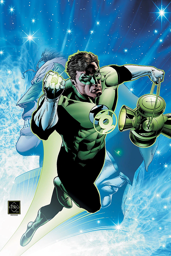

In [29]:
Image.open('Hal Jordan.jpg').to_thumb(256,256)

In [30]:
superhero_name = tuple(dc_characters)

In [33]:
superhero_name[0:3]

('DC character Hal Jordan', 'DC character Batman', 'DC character Dick Grayson')

In [ ]:
download_url(search_images('DC character Hal Jordan', max_images=1)[0], 'Hal Jordan.jpg', show_progress=True)


In [46]:
# test code
#path = Path('test')
# dest = (path)
# dest.mkdir(exist_ok=True, parents=True)
# download_images(dest, urls=search_images(f'DC character Batman shade photo'))

In [58]:
superhero_name[54:]

('DC character Black Adam',
 'DC character Miss Martian',
 'DC character Larfleeze',
 'DC character Detective Chimp',
 'DC character Alan Scott',
 'DC character Phantom Girl',
 'DC character Zatanna',
 'DC character Atrocitus',
 'DC character Mr Mxyzptlk',
 'DC character Harley Quinn',
 'DC character Gypsy',
 'DC character Kate Spencer',
 'DC character Black Canary',
 'DC character Poison Ivy',
 'DC character Knockout',
 'DC character Renee Montoya',
 'DC character Scandal Savage',
 'DC character Bane',
 'DC character Fire',
 'DC character Bizarro',
 'DC character Billy Batson',
 'DC character Amanda Waller',
 'DC character Jeannette',
 'DC character Talia al Ghul',
 'DC character Huntress (Bertinelli)',
 'DC character Deadshot',
 'DC character Phantom Stranger',
 'DC character Martian Manhunter',
 'DC character Mr Freeze',
 'DC character Superboy Prime',
 'DC character Ragdoll',
 'DC character Dream Girl',
 'DC character Mera',
 'DC character Starfire',
 'DC character Catwoman',
 'DC 

In [57]:
path = Path('dc_superheros')
from time import sleep

for o in superhero_name[55:]:
#for o in superhero_name:
    try:
        dest = (path/o)
        dest.mkdir(exist_ok=True, parents=True)
        download_images(dest, urls=search_images(f'{o} photo'))
        sleep(10)  # Pause between searches to avoid over-loading server
    #     download_images(dest, urls=search_images(f'{o} sun photo'))
    #     sleep(10)
    #     download_images(dest, urls=search_images(f'{o} shade photo'))
    #     sleep(10)
        resize_images(path/o, max_size=400, dest=path/o)
    except:
        print(o)

/home/swanaung/miniconda3/envs/fastai_env/lib/python3.9/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/swanaung/miniconda3/envs/fastai_env/lib/python3.9/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/swanaung/miniconda3/envs/fastai_env/lib/python3.9/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/swanaung/miniconda3/envs/fastai_env/lib/python3.9/site-packages/PIL/Image.py:1042: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


DC character Knockout


/home/swanaung/miniconda3/envs/fastai_env/lib/python3.9/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/swanaung/miniconda3/envs/fastai_env/lib/python3.9/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/swanaung/miniconda3/envs/fastai_env/lib/python3.9/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/swanaung/miniconda3/envs/fastai_env/lib/python3.9/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/swanaung/miniconda3/envs/fastai_env/lib/python3.9/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA

## Step 2: Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [59]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

704

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

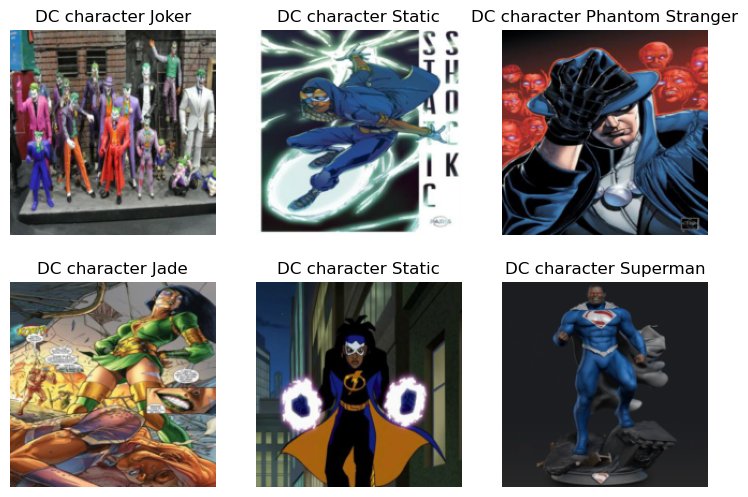

In [60]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "bird" or "forest").

    get_items=get_image_files, 

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be *bird* or *forest*).

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [61]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/home/swanaung/miniconda3/envs/fastai_env/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/swanaung/miniconda3/envs/fastai_env/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,4.592243,3.403413,0.769492,00:28


epoch,train_loss,valid_loss,error_rate,time
0,3.177329,2.749275,0.644992,00:29
1,2.321068,2.434963,0.567334,00:28
2,1.381203,2.387257,0.561479,00:29


In [62]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.354707,2.542583,0.569492,00:23


epoch,train_loss,valid_loss,error_rate,time
0,1.368753,2.565141,0.564869,00:28
1,0.911510,2.470206,0.537134,00:28
2,0.410086,2.464633,0.539291,00:28


In [10]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/home/swanaung/mambaforge/envs/torch_env/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/home/swanaung/mambaforge/envs/torch_env/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/swanaung/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:08<00:00, 5.60MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.728870,0.363167,0.064039,00:20


epoch,train_loss,valid_loss,error_rate,time
0,0.231702,0.149980,0.044335,00:05
1,0.144831,0.211737,0.064039,00:03
2,0.101629,0.200589,0.054187,00:03


## Step 3: Use our model (and build your own!)

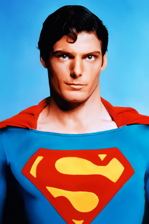

In [78]:
#PILImage.create('superman.jpg')

im = PILImage.create('superman.jpg')
im.thumbnail((224,224))
im

In [74]:
is_superman,_,probs = learn.predict(PILImage.create('superman.jpg'))

In [79]:
#export
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [82]:
#classify_image(im)

In [73]:
print(f"This is a: {is_superman}.")
print(f"Probability it's superman: {probs[0]:.4f}")

This is a: DC character Superman.
Probability it's superman: 0.0000


In [83]:
learn.export('model_output/model_dc_char.pkl')